inicio de script

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

cargar archivo txt

In [3]:
data = pd.read_csv("../data/raw/data_raw.txt",
                  names = ["id","titulo","precio","descripcion","comentarios","rooms","bathrooms","space m2"]
                  )

adecuar columnas para ubicacion, precio y espacio de inmueble

In [4]:
data = pd.DataFrame(data)
data["ubicacion"] = data["titulo"].str.slice(start=27)

In [5]:
data["precio"] = data["precio"].str.replace(".","", regex=False).astype(int)


In [6]:
data["space m2"] = data["space m2"].str.replace(" m²","", regex=False).astype(int)


In [7]:
data["comentarios"] = data["comentarios"].str.split('--')


In [8]:
data["ubicacion"].value_counts()

Bucaramanga                                                     355
Antonia Santos                                                   27
San Alonso                                                       11
El Prado                                                          7
Alarcón                                                           6
Mejoras Públicas                                                  4
Atlántico - Barranquilla - El Prado                               2
Santander - Floridablanca - Casco Antiguo&#x2F;floridablanca      1
Santander - Bucaramanga - Provenza                                1
Comuna 12 Cabecera del Llano                                      1
Name: ubicacion, dtype: int64

In [9]:
data["ubicacion"] = data["ubicacion"].str.replace("Comuna 12 Cabecera del Llano", "Cabecera", regex=False)
data["ubicacion"] = data["ubicacion"].str.replace("Santander - Bucaramanga - Provenza", "Provenza", regex=False)
data["ubicacion"] = data["ubicacion"].str.replace("Santander - Floridablanca - Casco Antiguo&#x2F;floridablanca", "Floridablanca", regex=False)

In [10]:
data["precio"] = data.precio/1000

In [11]:
data.head(10)

,id,titulo,precio,descripcion,comentarios,rooms,bathrooms,space m2,ubicacion
0,A101195,Apartamento en arriendo en Bucaramanga,830.0,COD:101195: Arriendo hermoso y amplio apartame...,"[Superficie cubierta: 75, Superficie total: 75...",3,2,75,Bucaramanga
1,A101152,Apartamento en arriendo en Bucaramanga,1400.0,COD:101152: Hermoso y amplio apartamento en ar...,"[Baño de servicio, Parqueaderos, Comedor, Cuar...",4,3,84,Bucaramanga
2,A101166,Apartamento en arriendo en Bucaramanga,1200.0,CODIGO - 101166 - Hermoso apartamento ubica...,"[Cancha de futbol, Area deportiva, Cancha depo...",2,2,43,Bucaramanga
3,A101200,Apartamento en arriendo en Bucaramanga,1200.0,COD:101200: Arriendo hermoso y amplio apartame...,"[Ropa de cama, Closet]",2,2,66,Bucaramanga
4,A95595,Apartamento en arriendo en Bucaramanga,2000.0,CODIGO:95595 Se arrienda amplia casa ubicada e...,"[Superficie total: 396, Superficie cubierta: 792]",4,4,396,Bucaramanga
5,4844004,Apartamento en arriendo en Antonia Santos,1150.0,M.J Grupo Inmobiliario sas arrienda apartament...,"[Baños: 2, Parqueaderos, Habitaciones, Cantida...",3,2,90,Antonia Santos
6,4864977,Apartamento en arriendo en Bucaramanga,1300.0,M.J. grupo inmobiliario arrienda o vende apart...,"[Superficie cubierta: 80, Superficie del terre...",3,2,80,Bucaramanga
7,4869083,Apartamento en arriendo en Bucaramanga,1100.0,Se Arrienda Casa en Hacienda San Juan en Flori...,"[Largo del terreno (mts): 88, Superficie del t...",4,3,88,Bucaramanga
8,4887879,Apartamento en arriendo en Antonia Santos,1150.0,M.J. grupo inmobiliario arrienda apartamento e...,"[Baños: 2, Habitaciones, Cantidad de habitacio...",3,2,80,Antonia Santos
9,A100955,Apartamento en arriendo en Bucaramanga,1800.0,CODIGO - 100955 - Hermoso apartamento en arr...,"[Ropa de cama, Closet]",3,2,64,Bucaramanga


eliminar registros diferentes al area metropolitana de bucaramanga

In [12]:
data.drop(data[data["ubicacion"] == "Atlántico - Barranquilla - El Prado"].index, inplace = True)

In [13]:
data.shape

(413, 9)

In [24]:
data.describe()

,precio,rooms,bathrooms,space m2
count,413.000000,413.000000,413.000000,413.000000
mean,1115.665860,2.552058,1.956416,1726.319613
std,1915.630565,0.892431,0.729436,28547.925198
min,280.000000,1.000000,1.000000,21.000000
25%,750.000000,2.000000,1.000000,60.000000
50%,900.000000,3.000000,2.000000,75.000000
75%,1150.000000,3.000000,2.000000,88.000000
max,38000.000000,5.000000,6.000000,570000.000000


In [116]:
hab = data.groupby(data.rooms)
print(hab)
num_hab = dict(data.rooms.value_counts())
bathrooms = dict(data.bathrooms.value_counts())
bathrooms = dict(data.bathrooms.value_counts())

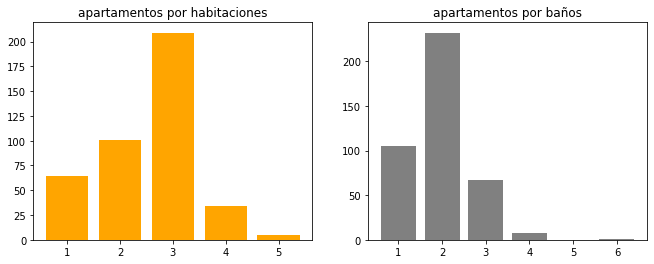

In [151]:
plt.figure(figsize = (11, 4))

plt.subplot(1, 2, 1)
plt.bar(num_hab.keys(), num_hab.values(),color="orange")
plt.title("apartamentos por habitaciones")
plt.subplot(1, 2, 2)
plt.bar(bathrooms.keys(), bathrooms.values(),color="grey")
plt.title("apartamentos por baños")
plt.show()

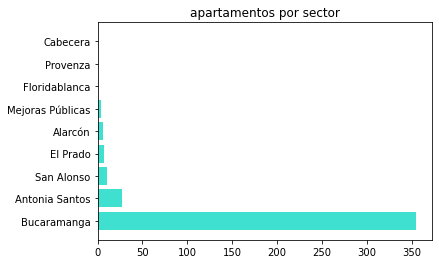

In [162]:
sectores = dict(data.ubicacion.value_counts())
plt.barh(list(sectores.keys()), list(sectores.values()), color="turquoise")
plt.title("apartamentos por sector")
plt.show()


podemos observar que la sectorizacion de los apartamentos en arriendo no estan del todo completa, por lo que se hace dificil obtener una información precisa de que tanto cambia el precio dependiendo de la ubicación.